# TASK- 02

## Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

### Importing Libraries

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
data = pd.read_csv('titanic.csv', index_col = 'PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()   # we will check the null values and treat them

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [4]:
data.info()     # checking the datatype of columns

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
#dropping the column 'Cabin' and all those rows where 'Embarked' has null values
data = data.drop(columns='Cabin').dropna(subset=['Embarked']) 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       712 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


In [7]:
data.shape

(889, 10)

In [37]:
#creating a function to check the unique values in the feasible columns 
def unique_values(data, col):     
    x = data[col].value_counts()
    unique_value = data[col].nunique()
    print(f'number of unique values for "{col}" is {unique_value}.')
    print(f'value_counts of "{col}" are:\n{x}')
    print('\n')

In [19]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [34]:
# creating the new dataframe on which i directly apply the unique_values function using the loop
new_data = data[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]
new_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
PassengerId,,,,,,
1,0,3,male,1,0,S
2,1,1,female,1,0,C
3,1,3,female,0,0,S
4,1,1,female,1,0,S
5,0,3,male,0,0,S


In [38]:
for i in new_data:    #checking out the distribution in category wise for each column
    unique_values(new_data, i)

number of unique values for "Survived" is 2.
value_counts of "Survived" are:
Survived
0    549
1    340
Name: count, dtype: int64


number of unique values for "Pclass" is 3.
value_counts of "Pclass" are:
Pclass
3    491
1    214
2    184
Name: count, dtype: int64


number of unique values for "Sex" is 2.
value_counts of "Sex" are:
Sex
male      577
female    312
Name: count, dtype: int64


number of unique values for "SibSp" is 7.
value_counts of "SibSp" are:
SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


number of unique values for "Parch" is 7.
value_counts of "Parch" are:
Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


number of unique values for "Embarked" is 3.
value_counts of "Embarked" are:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64




### filling the missing values in the 'Age' Column

In [43]:
avg_age=data.groupby('Pclass')['Age'].mean()   # we have calculated the average age of passengers in each class
avg_age

Pclass
1    38.105543
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [40]:
data.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.193299
Name: Age, dtype: float64

In [44]:
age_null = data[data['Age'].isnull()].groupby('Pclass').size()
age_null  # we have calculated the null value_count in each class

Pclass
1     30
2     11
3    136
dtype: int64

In [47]:
#define a function to fill the age with the mean of age of respective pclass 
def fill_age(data):
    if pd.isnull(data['Age']):
        return avg_age[data['Pclass']]
    else:
        return data['Age']

In [48]:
# apply the function to the 'Age' column 
data['Age'] = data.apply(fill_age, axis = 1)

In [49]:
# checking if there is null values in the 'Age' Column
data['Age'].isnull().sum()

0

In [50]:
# Check if the average age of each pclass has changed or not 
data.groupby('Pclass')['Age'].mean()

Pclass
1    38.105543
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [51]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### Feature Engineering

In [52]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [63]:
# We will rename the values in 'Survived' and 'Pclass' Columns , for the better visualization
data['Survived'] = data['Survived'].replace({0: 'Not Survived', 1: 'Survived'})
data['Pclass'] = data['Pclass'].replace({3: 'Lower', 2: 'Middle', 1: 'Upper'})

In [54]:
data['Survived'].value_counts()

Survived
Not Survived    549
Survived        340
Name: count, dtype: int64

In [55]:
data['Pclass'].value_counts()

Pclass
Upper     491
Lower     214
Middle    184
Name: count, dtype: int64

### Data Visualization

In [56]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

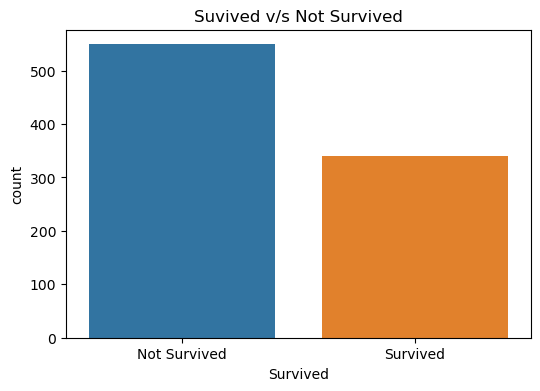

In [60]:
# plotting the number of people survived vs not survived
plt.figure(figsize = (6, 4))
sns.countplot(data=data, x='Survived')

plt.title('Suvived v/s Not Survived')
plt.show();

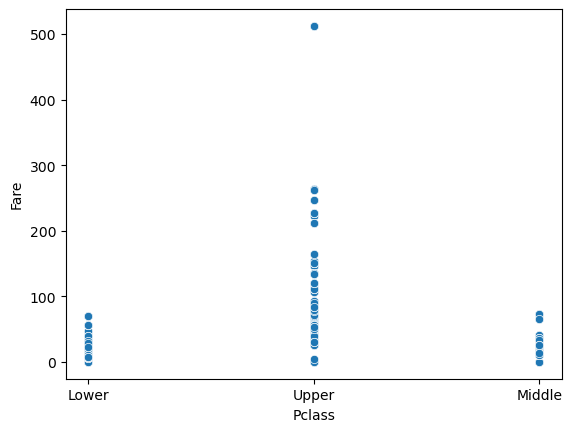

In [64]:
sns.scatterplot(data = data, x = 'Pclass', y = 'Fare')
plt.show()

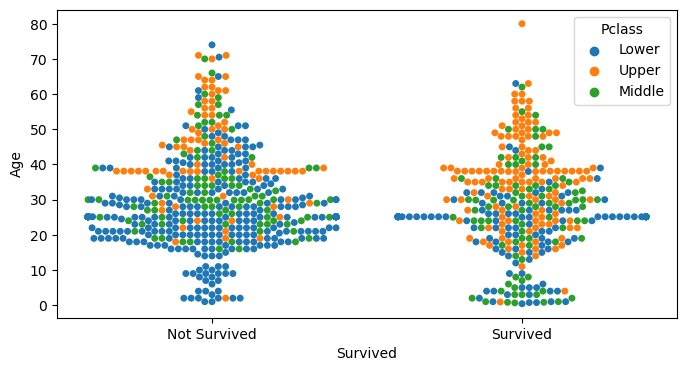

In [74]:
# visualizing which age group didn't survived and from which class
plt.figure(figsize = (8, 4))
sns.swarmplot(data = data, x = 'Survived', y = 'Age', hue = 'Pclass')
plt.show()

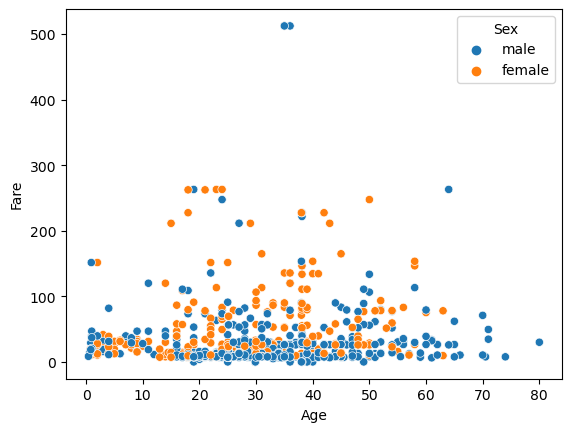

In [79]:
sns.scatterplot(x = data['Age'], y = data['Fare'], hue = data['Sex'])
plt.show()

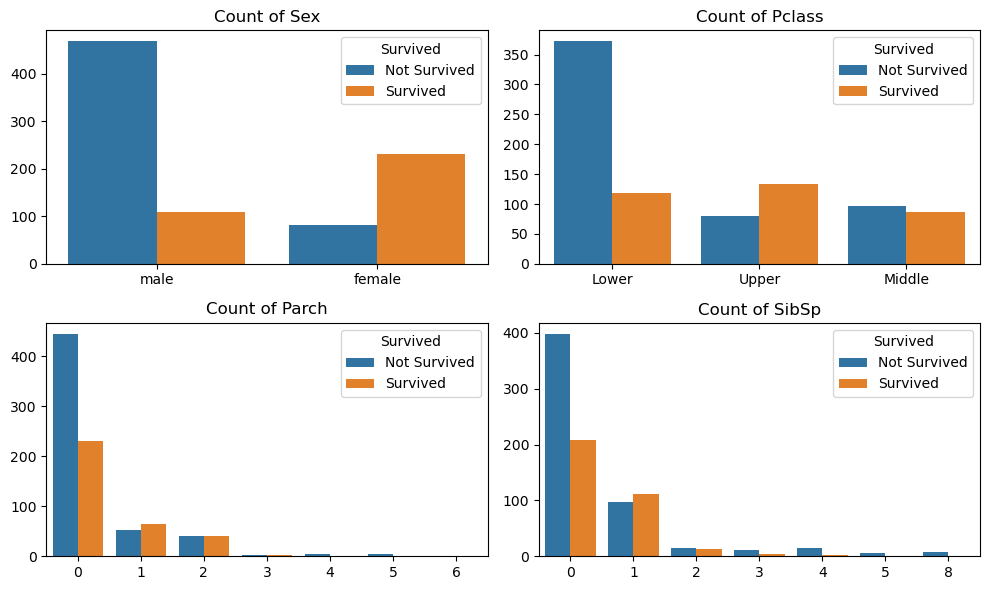

In [69]:
# ploting subplots of countplot on Distribution of AGE and Fare.


cat_cols = ['Sex', 'Pclass', 'Parch', 'SibSp']
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for feature, ax in zip(cat_cols, axes.flatten()):
    sns.countplot(data=data, x=feature, hue='Survived', ax=ax)
    ax.set_title(f'Count of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show();

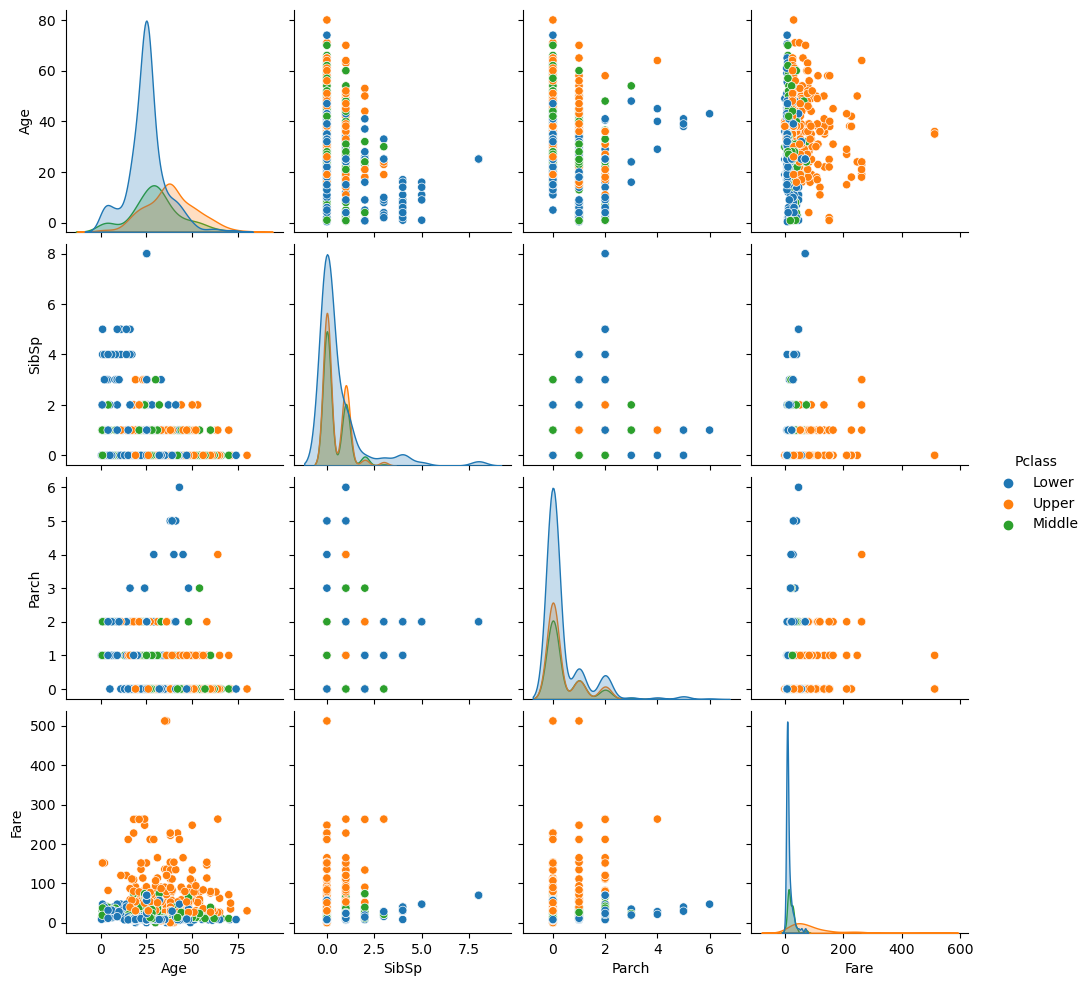

In [85]:
sns.pairplot(data, hue = 'Pclass')
plt.show()

# Thank You!!